In [65]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [66]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [67]:
data = pd.read_csv('german_credit.csv')

In [68]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [69]:
data.dtypes 

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [70]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [72]:
# Print Shape of model data
data.shape

(1000, 21)

### Check for highly correlated variables but don't required any treatment for this use case

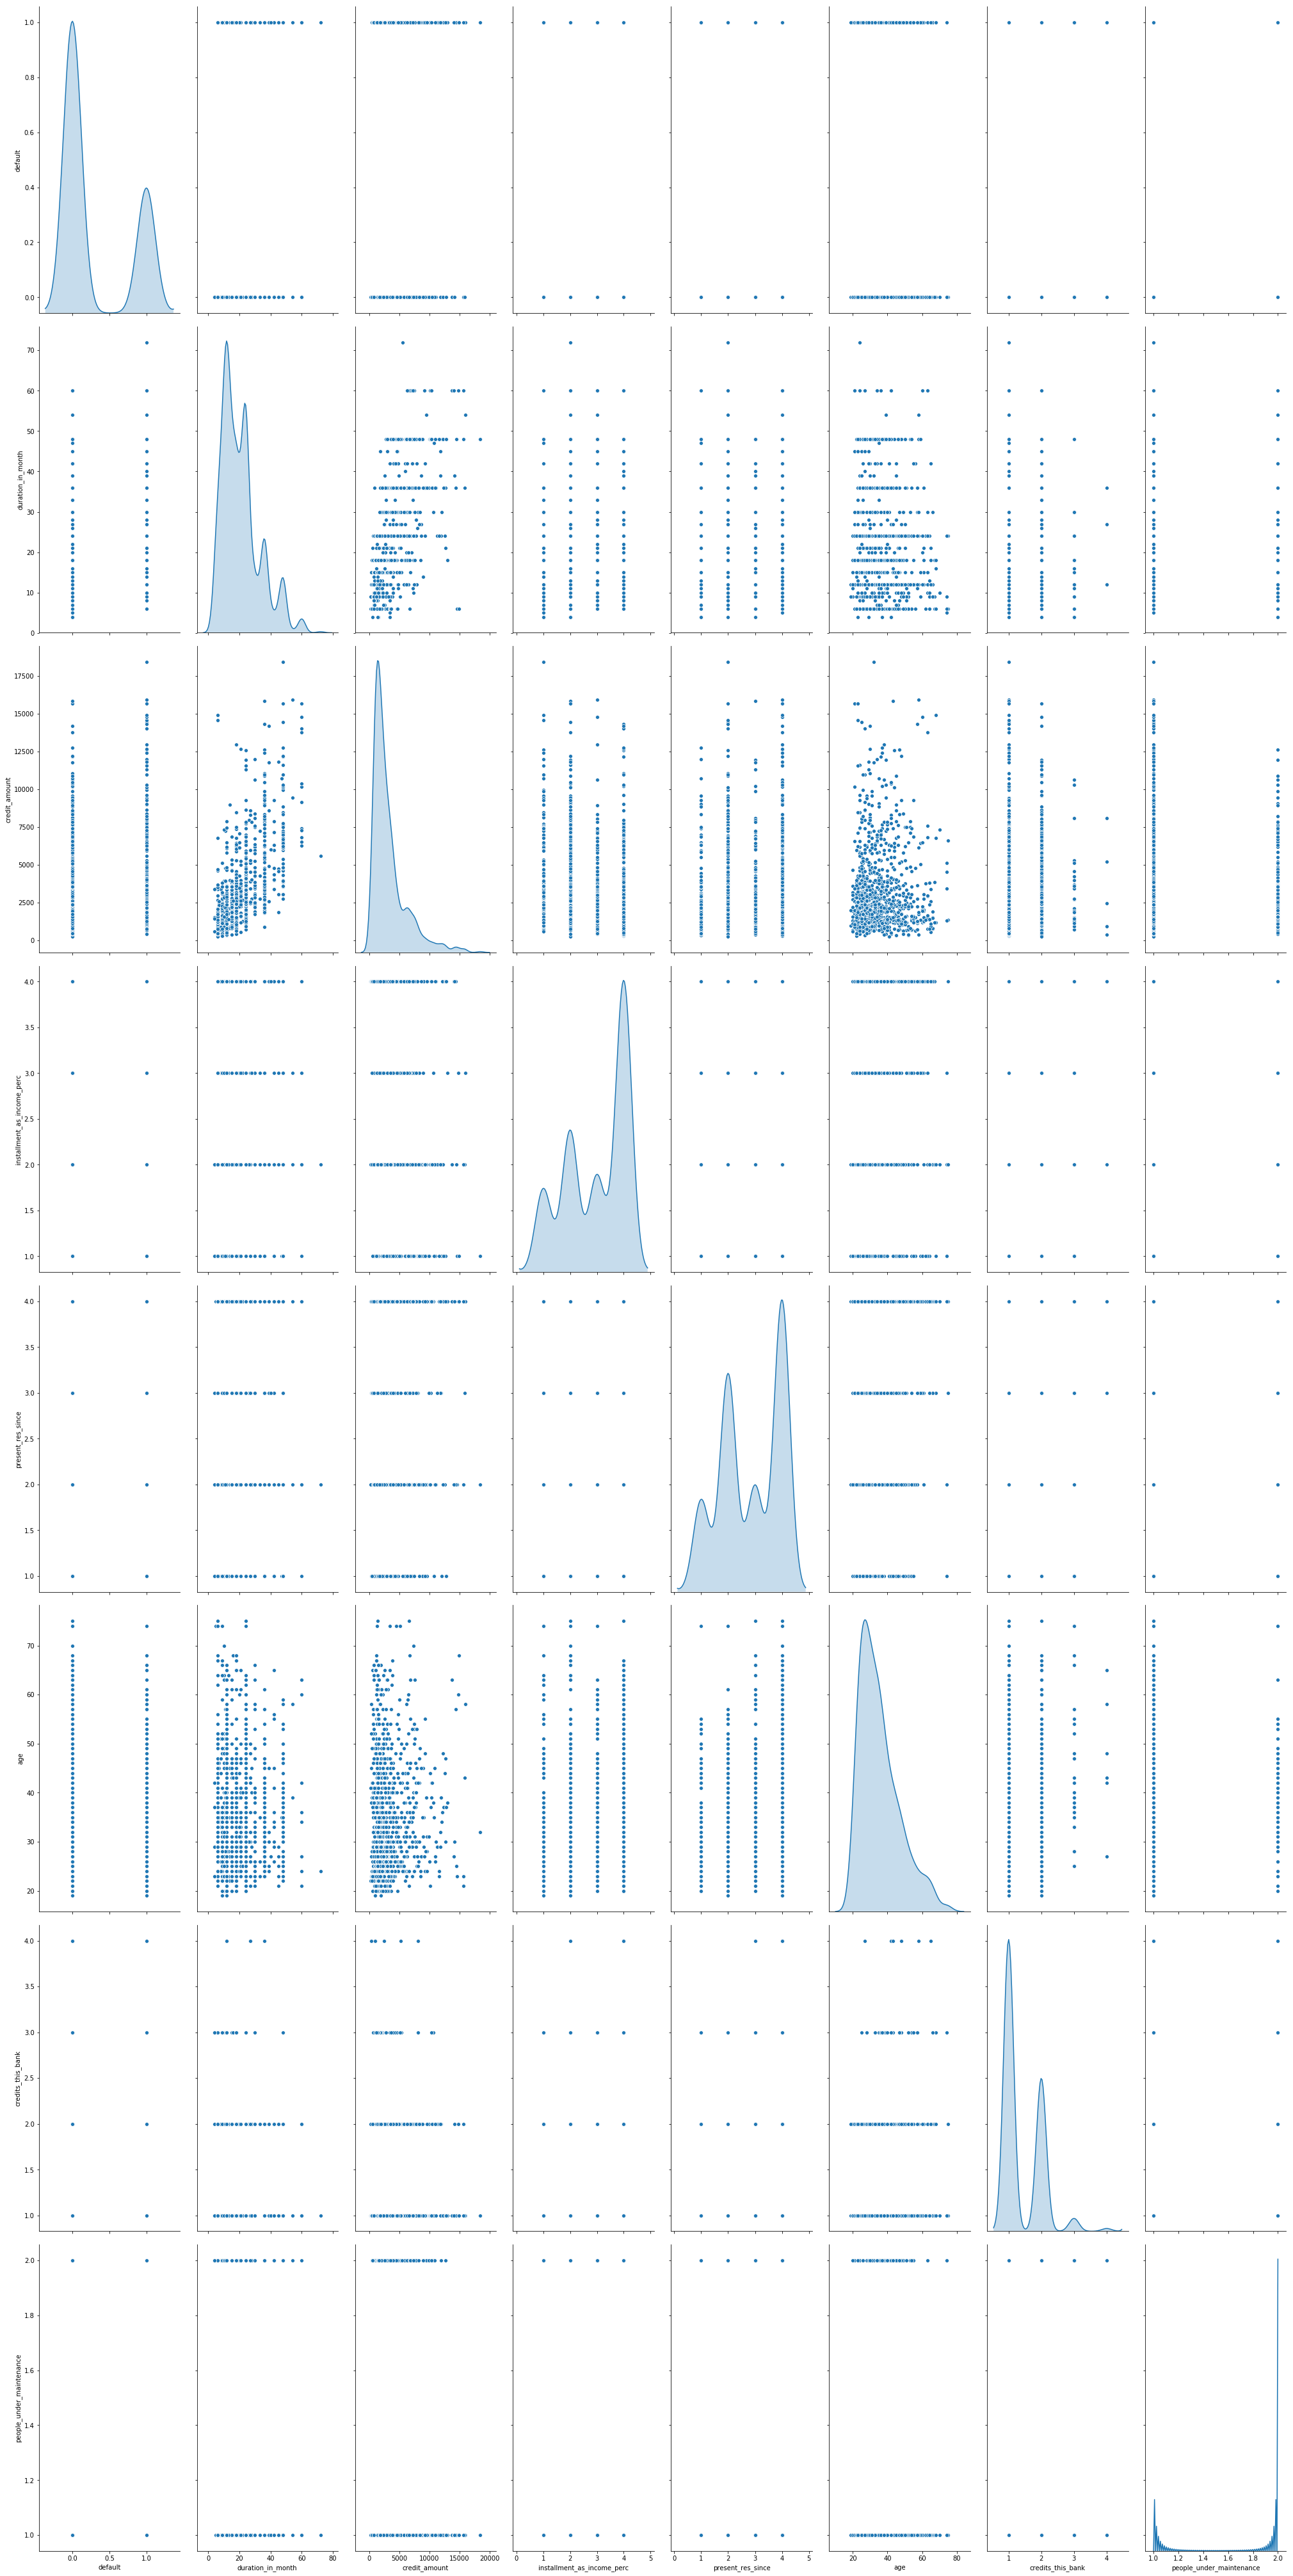

In [15]:
sns.pairplot(data, size=7,aspect=0.5 , diag_kind='kde')

In [ ]:
# age is co related with duration in months and credit history

### Drop the original variables which are converted to dummy

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#zscore

In [74]:
 data_dummy = pd.get_dummies(data, dummy_na=True)

In [75]:
data_dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,job_nan,telephone_none,"telephone_yes, registered under the customers name",telephone_nan,foreign_worker_no,foreign_worker_yes,foreign_worker_nan
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,0,0,1,0,0,1,0
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
2,0,12,2096,2,3,49,1,2,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,42,7882,2,4,45,1,2,0,1,...,1,0,0,0,1,0,0,0,1,0
4,1,24,4870,3,4,53,2,2,0,1,...,1,0,0,0,1,0,0,0,1,0


In [77]:
columns = data_dummy.columns
columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account', 'account_check_status_nan',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'credit_history_nan', 'purpose_(vacation - does not exist?)',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'pu

In [78]:
scaler.fit(data_dummy)
data_dummy=scaler.transform(data_dummy)
data_dummy = pd.DataFrame(data_dummy)

In [79]:
data_dummy.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.654654,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,-1.214598,1.214598,0.0,-0.196014,0.196014,0.0
1,1.527525,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
2,-0.654654,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,...,-1.304877,-0.149983,2.0,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
3,-0.654654,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
4,1.527525,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0


In [80]:
data_dummy.columns= columns

In [81]:
data_dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,job_nan,telephone_none,"telephone_yes, registered under the customers name",telephone_nan,foreign_worker_no,foreign_worker_yes,foreign_worker_nan
0,-0.654654,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,-1.214598,1.214598,0.0,-0.196014,0.196014,0.0
1,1.527525,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
2,-0.654654,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,...,-1.304877,-0.149983,2.0,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
3,-0.654654,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
4,1.527525,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [82]:
X = data_dummy.drop("default" , axis=1)

y = data_dummy.pop("default")

In [91]:
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,job_nan,telephone_none,"telephone_yes, registered under the customers name",telephone_nan,foreign_worker_no,foreign_worker_yes,foreign_worker_nan
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,-0.259299,...,0.766356,-0.149983,-0.5,0.0,-1.214598,1.214598,0.0,-0.196014,0.196014,0.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,-0.259299,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,-0.259299,...,-1.304877,-0.149983,2.0,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,-0.259299,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,-0.259299,...,0.766356,-0.149983,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0


In [92]:
y.head()

0   -0.654654
1    1.527525
2   -0.654654
3   -0.654654
4    1.527525
Name: default, dtype: float64

In [94]:
train_set.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,job_nan,telephone_none,"telephone_yes, registered under the customers name",telephone_nan,foreign_worker_no,foreign_worker_yes,foreign_worker_nan
731,0.256953,-0.455197,-0.870183,1.046987,-1.279356,-0.704926,2.334869,-0.606621,1.627770,-0.259299,...,-1.304877,-0.149983,2.0,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
716,0.754763,-0.068853,0.024147,-0.765977,0.391740,1.027079,2.334869,-0.606621,-0.614337,-0.259299,...,0.766356,-0.149983,-0.5,0.0,-1.214598,1.214598,0.0,-0.196014,0.196014,0.0
640,-0.240857,-0.893643,0.918477,-1.672459,-0.751642,-0.704926,-0.428290,-0.606621,1.627770,-0.259299,...,-1.304877,6.667424,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
804,-0.738668,1.488925,-1.764514,-0.765977,-1.015499,-0.704926,-0.428290,1.648476,-0.614337,-0.259299,...,-1.304877,6.667424,-0.5,0.0,0.823318,-0.823318,0.0,-0.196014,0.196014,0.0
737,-0.240857,0.392986,0.024147,1.046987,-0.048022,-0.704926,2.334869,-0.606621,1.627770,-0.259299,...,-1.304877,-0.149983,2.0,0.0,-1.214598,1.214598,0.0,-0.196014,0.196014,0.0


In [95]:
train_labels.head()

731    1.527525
716   -0.654654
640    1.527525
804   -0.654654
737   -0.654654
Name: default, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [100]:
import numpy as np
train_labels1 = np.array(train_labels)
train_set1 = np.array(train_set)

In [101]:
train_labels1
train_set1

array([[ 0.25695309, -0.45519674, -0.87018333, ..., -0.19601428,
         0.19601428,  0.        ],
       [ 0.75476341, -0.06885346,  0.02414692, ..., -0.19601428,
         0.19601428,  0.        ],
       [-0.24085723, -0.89364319,  0.91847717, ..., -0.19601428,
         0.19601428,  0.        ],
       ...,
       [-0.48976238,  0.11439376, -1.76451358, ..., -0.19601428,
         0.19601428,  0.        ],
       [ 0.25695309, -0.51332545,  0.91847717, ..., -0.19601428,
         0.19601428,  0.        ],
       [-0.24085723, -0.41514463,  0.91847717, ..., -0.19601428,
         0.19601428,  0.        ]])

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [89]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=9999,criterion="entropy",n_estimators=500)


In [ ]:
# Train the Classifier to take the training features and learn how they relate
# to the training y (the species
rf.fit(train_set1, train_labels1);

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

### Q6 Show the list of the features importance( 1 Marks)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [0]:
#Calculate Mean score

In [0]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
